# This is a duplicate version of the following kaggle kernel
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook




In [1]:
import seaborn as sns
import pandas as pd

data = pd.read_csv('train.csv')
# data1 = data
data.describe()
data.columns


data['SalePrice'].describe()

sns.distplot(data['SalePrice'])
print data['SalePrice'].skew()
print data['SalePrice'].kurt()
data['TotalBsmtSF'].describe()



1.8828757597682129
6.536281860064529


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

(-0.5, 9.5, 0, 800000)

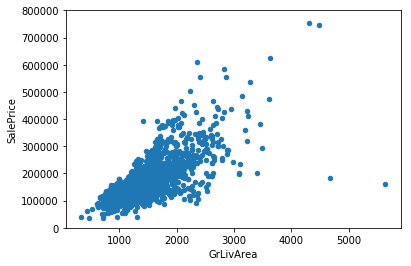

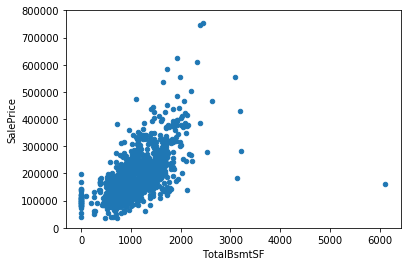

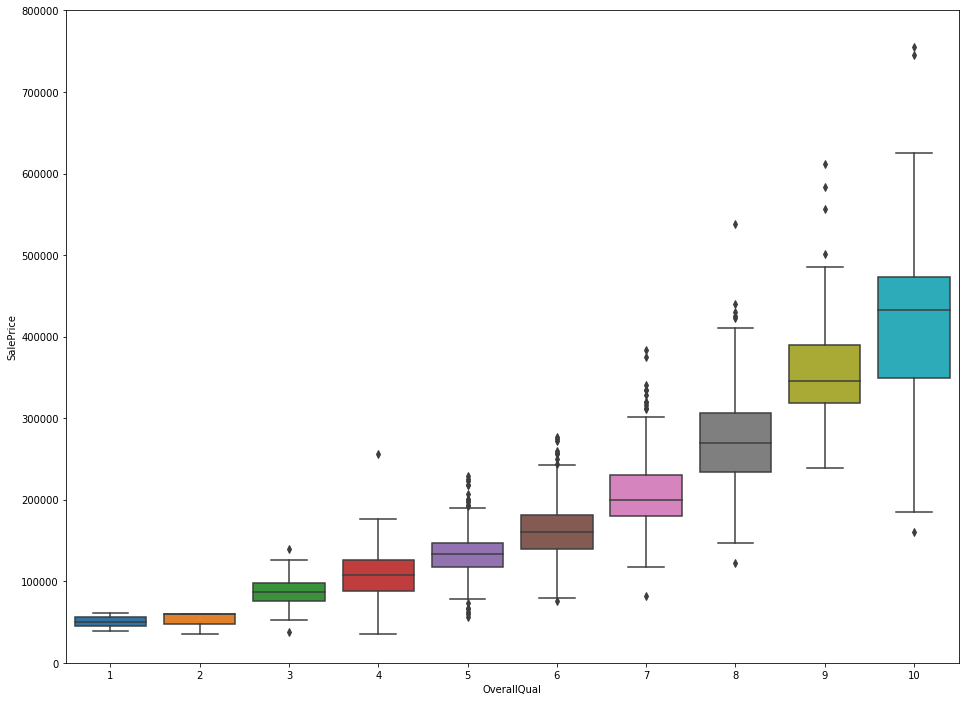

In [39]:
var = 'GrLivArea'
plotdata = pd.concat([data['SalePrice'],data[var]],axis = 1)
plotdata.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000))

var1 = 'TotalBsmtSF'
plotdata1 = pd.concat([data['SalePrice'],data[var1]],axis = 1)
plotdata1.plot.scatter(x = var1, y = 'SalePrice', ylim = (0,800000))

import matplotlib.pyplot as plt
var2 = 'OverallQual'
plotdata2 = pd.concat([data['SalePrice'],data[var2]],axis = 1)
f, ax = plt.subplots(figsize=(16,12))
fig = sns.boxplot(x = var2, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)


(-0.5, 111.5, 0, 800000)

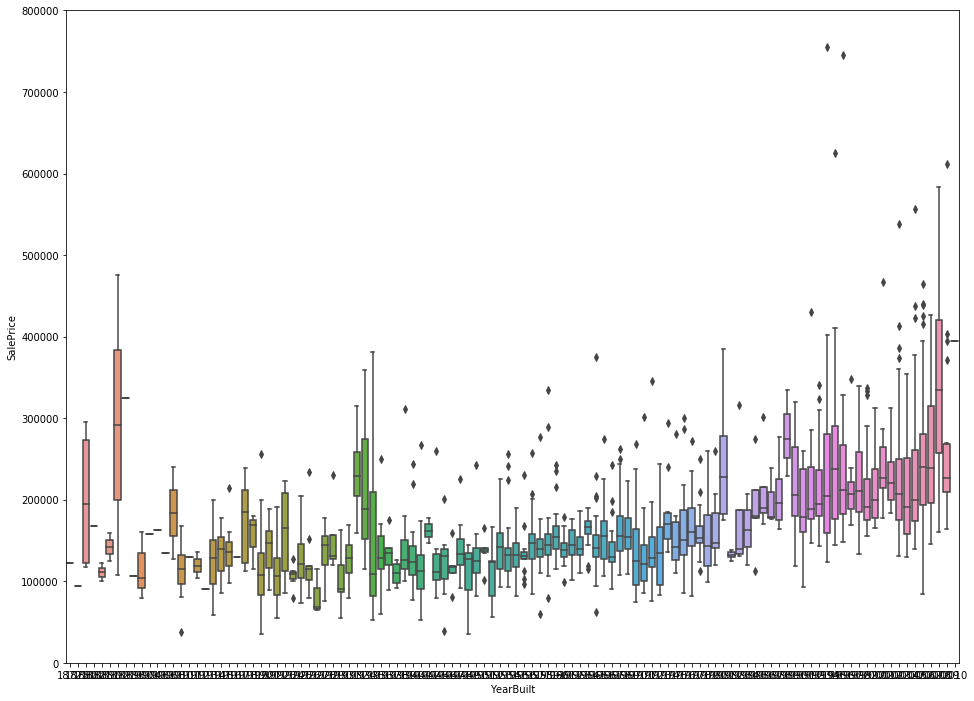

In [41]:
var3 = 'YearBuilt'
plotdata2 = pd.concat([data['SalePrice'],data[var3]],axis = 1)
f, ax = plt.subplots(figsize=(16,12))
fig = sns.boxplot(x = var3, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)



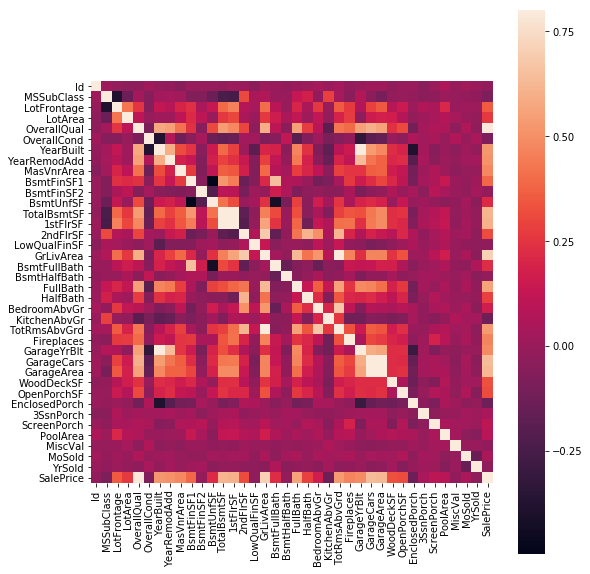

In [52]:
data_corr = data.corr()
f, ax = plt.subplots(figsize=(9,10))
sns.heatmap(data_corr, square = True, vmax = .8)

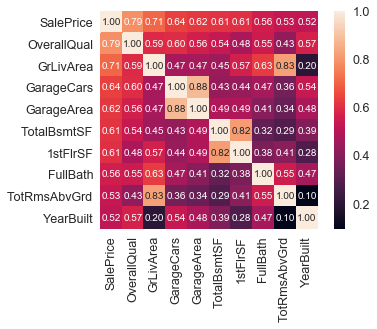

In [65]:
import numpy as np
attr_count = 10
cols = data_corr.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, square = True, annot = True, annot_kws = {'size' : 10}, fmt = '.2f',  yticklabels=cols.values, xticklabels=cols.values)

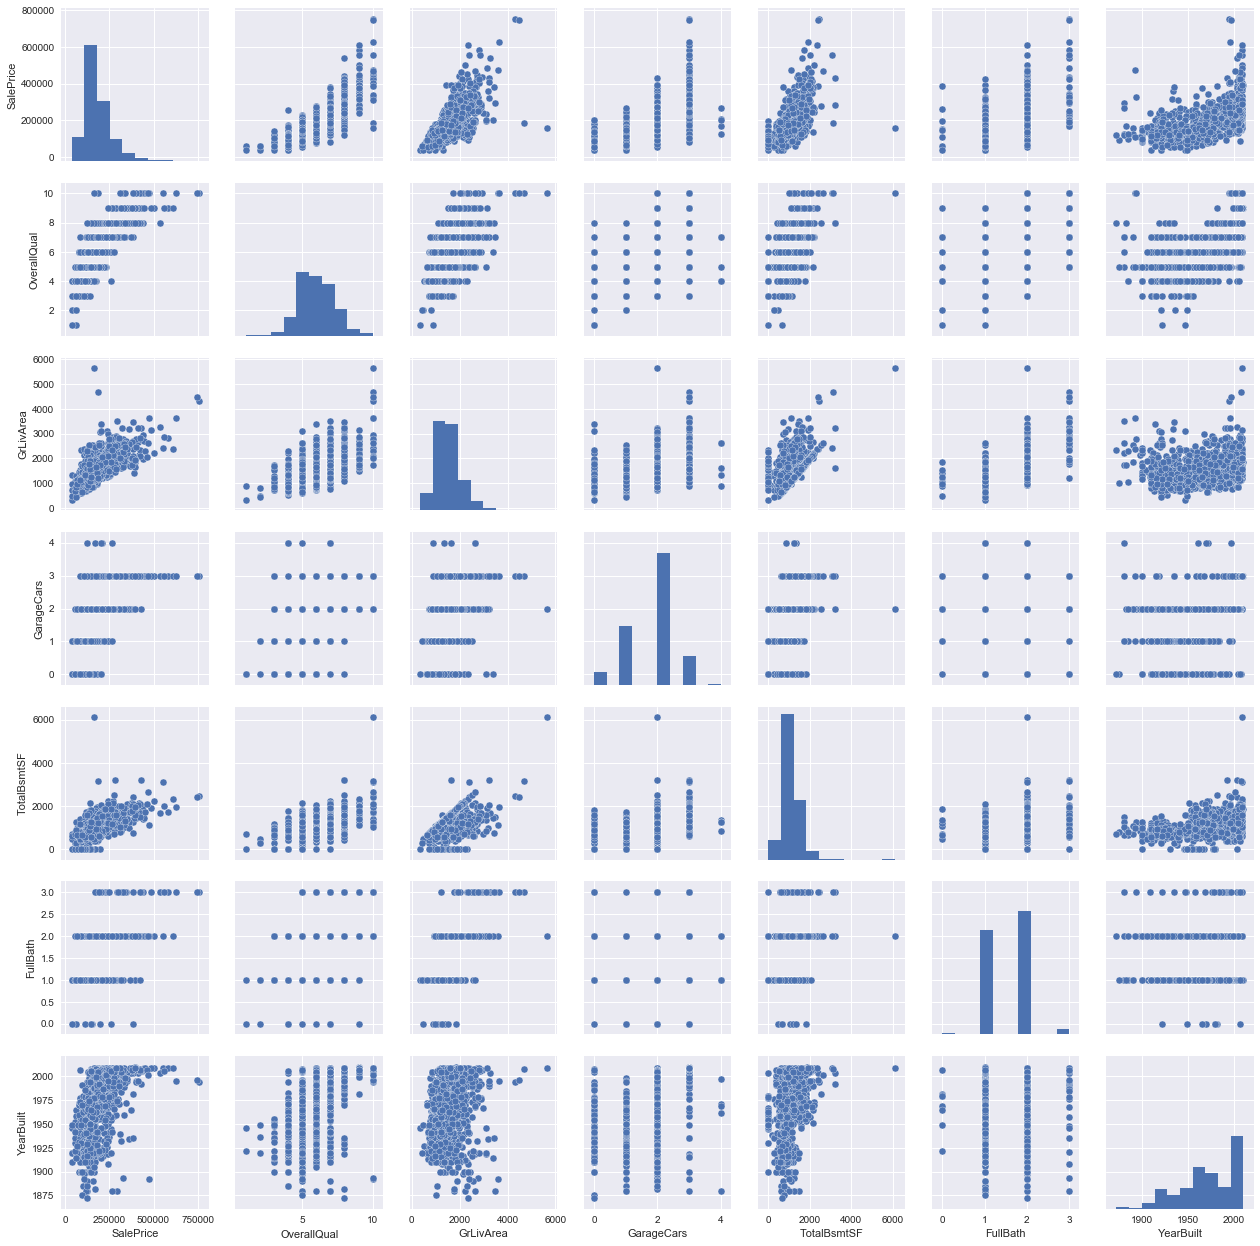

In [66]:
sns.set()

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols],size= 2.5)


Lets see number of missing values for each attribute

In [84]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['total', 'percent'])
missing_data.head(20)
# missing_data.describe()
# print total

total   percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

In [98]:
from sklearn.preprocessing import StandardScaler
scaled_sale_price = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis])
low_price = scaled_sale_price[scaled_sale_price[:,0].argsort()][:10]
high_price = scaled_sale_price[scaled_sale_price[:,0].argsort()][-10:]
print 'Min price distribution :'
print low_price
print '\nMax price distribution :'
print high_price

Min price distribution :
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

Max price distribution :
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]
